In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('http://taanila.fi/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area',
             'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area',
             'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
df.head(20)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


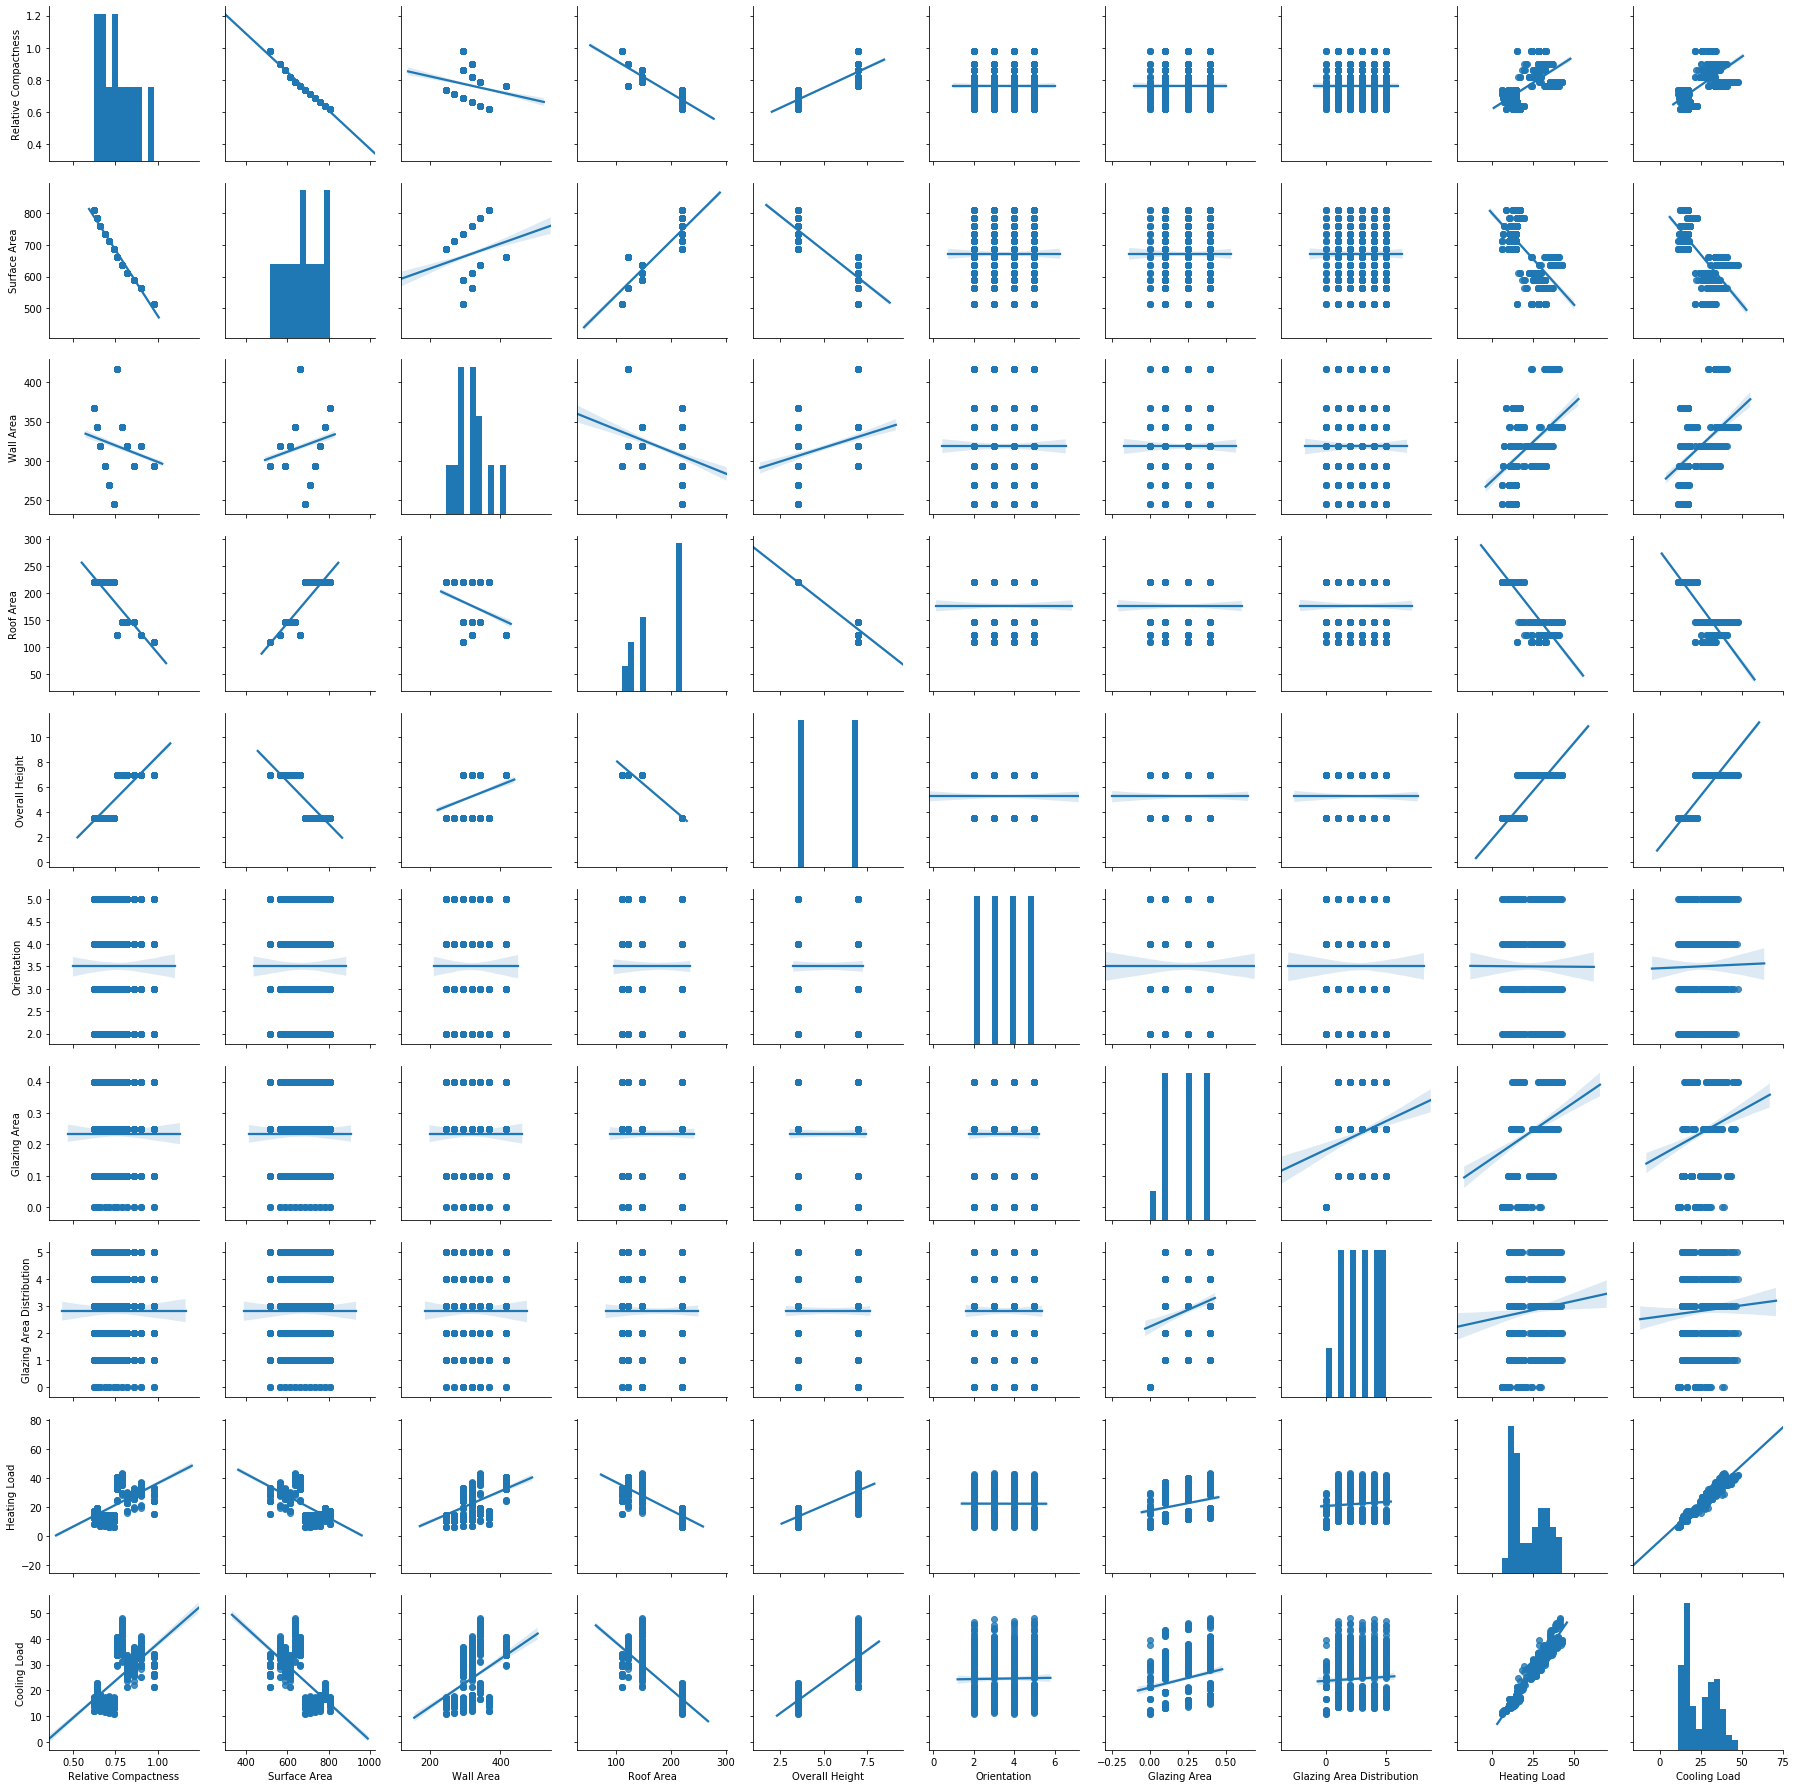

In [5]:
sns.pairplot(df, kind='reg')

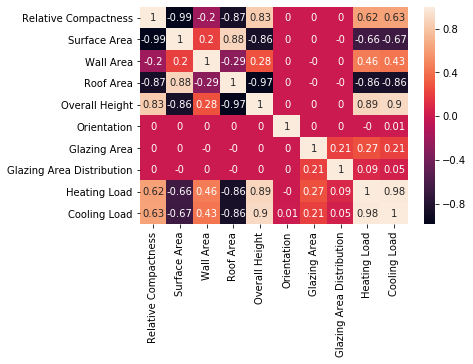

In [8]:
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

In [9]:
X = df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']]
y = df['Heating Load']

In [10]:
from sklearn.linear_model import LinearRegression

malli = LinearRegression().fit(X,y)

In [11]:
malli.coef_

array([-6.47806434e+01,  3.23112859e+10, -3.23112859e+10, -6.46225718e+10,
        4.16948897e+00, -2.33158932e-02,  1.99327366e+01,  2.03765322e-01])

In [12]:
malli.intercept_

84.0259453125

In [13]:
malli.score(X,y)

0.9162033178290991

Text(0, 0.5, 'Poikkeama todellisesta')

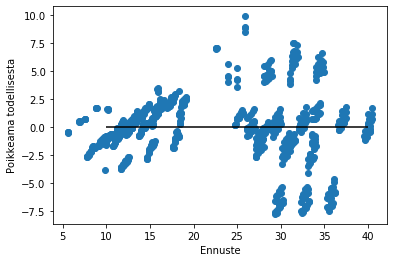

In [15]:
plt.scatter(malli.predict(X), malli.predict(X)-y)

plt.hlines(y=0, xmin=10, xmax=40)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

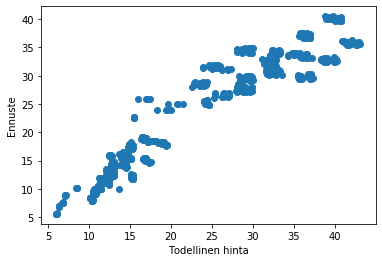

In [16]:
plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen hinta')
plt.ylabel('Ennuste')

In [17]:
import statsmodels.api as sm

X = sm.add_constant(X)

malli_sm = sm.OLS(y, X).fit()

print(malli_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 06 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:43:49   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Users\noora\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
